# spanish texts

## text corpus

In [1]:
import pandas as pd 

In [2]:
import pandas as pd
corpus = pd.read_csv('corpus.txt', delimiter = "\t", header=None)
corpus.columns = ['texts']

In [3]:
corpus = list(corpus['texts'])

In [4]:
corpus[:15]

['El curso está en general bien constituido ',
 'Lo mejor de él es el cuerpo docente con el cual se establece una abierta',
 'El orden de los contenido',
 'Que se pongan de acuerdo si se va a prorizar el contenido de las clases o el de la bibliografía',
 'Que se mantenga la dinamica de separar por dias las prueba teorica de la práctica',
 'Que se agregue una mesa mas en los practicos a fin ',
 'disminuir el numero de alumnos por mesas ',
 '6 a 8 alumnos por mesa permitiendo un aprendizaje mas personalizado',
 'Deberian haber mas practicos ',
 'Me gustaria que se hicieran mas ayudantías antes de las pruebas ',
 'que los practicos sean mas clase, en vez de dejarnos solos a identificar estructuras.',
 'Que las solemnes sigan siendo separadas ',
 'sigan con los seminarios hechos desde la casa',
 'que se aconseje un libro para el estudio de una determinada materia',
 'capítulos a leer para obtener la información desde una fuente que le aporte para el aprendizaje.']

In [5]:
def tokenize(s):
    return s.split(' ')

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
!pip install -U pip setuptools wheel

     |████████████████████████████████| 1.6 MB 23.3 MB/s eta 0:00:01
     |████████████████████████████████| 819 kB 67.3 MB/s eta 0:00:01
  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 49.6.0.post20210108
    Uninstalling setuptools-49.6.0.post20210108:
      Successfully uninstalled setuptools-49.6.0.post20210108
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [8]:
pip install -U spacy

     |████████████████████████████████| 5.9 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 622 kB 44.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 72.8 MB/s eta 0:00:01
     |████████████████████████████████| 456 kB 45.3 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 18.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 58 kB 10.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
!python -m spacy download es_dep_news_trf

     |████████████████████████████████| 410.0 MB 6.2 kB/s  eta 0:00:01█████████████▏                | 193.8 MB 80.8 MB/s eta 0:00:03
     |████████████████████████████████| 40 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 998 kB 58.9 MB/s eta 0:00:01
     |████████████████████████████████| 831.4 MB 3.7 kB/s  eta 0:00:01     |██████████▋                     | 274.3 MB 78.0 MB/s eta 0:00:08     |████████████████                | 416.2 MB 389 kB/s eta 0:17:46██████████████▊           | 539.0 MB 89.0 MB/s eta 0:00:04     |████████████████████████▍       | 633.9 MB 45.7 MB/s eta 0:00:05
     |████████████████████████████████| 2.6 MB 69.8 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 75.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 17.4 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('es_dep_news_trf')


In [10]:
import spacy
nlp = spacy.load('es_dep_news_trf')

In [28]:
def remove_accents(raw_text):

    raw_text = re.sub(u"[àáâãäå]", 'a', raw_text)
    raw_text = re.sub(u"[èéêë]", 'e', raw_text)
    raw_text = re.sub(u"[ìíîï]", 'i', raw_text)
    raw_text = re.sub(u"[òóôõö]", 'o', raw_text)
    raw_text = re.sub(u"[ùúûü]", 'u', raw_text)
    return raw_text 

In [135]:
from spacy.lang.es.stop_words import STOP_WORDS

def clean(sentence):
    sentence = re.sub(u'[^a-zA-Z0-9: ]', repl, sentence.encode().decode('utf-8'))
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    doc = nlp(sentence)
    sentence = [token.lemma_ for token in doc if token.pos_=='NOUN']
    sentence=list(filter(None, [w.lower().translate(table) for w in sentence]))
    sentence = [w for w in sentence if w not in STOP_WORDS]
    #language=[[w for w in s if w!="''"] for s in language] 
    #language=[[w for w in s if w!='̃'] for s in language] 
    sentence=[remove_accents(w) for w in sentence if not w.isdigit()]
    return sentence

In [136]:
clean('El curso está,, disposición ün en general; bien constituido ')

['curso', 'disposicion', 'n']

## basic statistics: types and tokens

In [137]:
#clean_corpus_all = [clean(sentence) for sentence in corpus]
#index_sentences = dict(zip(range(len(clean_corpus_all),clean_corpus_all)))
clean_corpus = []
CORPUS = []
for i in range(len(corpus)):
    C = clean(corpus[i])
    if len(C)>1:
        clean_corpus+=[C]
        CORPUS+=[corpus[i]]

In [138]:
clean_corpus[:5]

[['orden', 'contenido'],
 ['contenido', 'clase', 'bibliografia'],
 ['dinamica', 'prueba', 'practica'],
 ['mesa', 'practico'],
 ['numero', 'alumno', 'mesa']]

In [139]:
from collections import Counter

In [140]:
words =[item for sublist in clean_corpus for item in sublist]
number_tokens = len(words)
number_types = len(set(words))
print(number_tokens,number_types)

760 252


## graphs!

In [141]:
import networkx as nx

In [142]:
## adjacency graph
## n_sent: graph with n_sent sentences

def GoW(radius=4):
    G=nx.Graph()
    for sentence in clean_corpus:
        if len(sentence)>1:
            pairs=[]
            for r in list(range(1,radius+1)):
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)      
    return G.subgraph(Gcc[0]).copy()

In [143]:
graph_text = GoW()

In [144]:
graph_text.nodes()

NodeView(('orden', 'contenido', 'clase', 'bibliografia', 'dinamica', 'prueba', 'practica', 'mesa', 'practico', 'numero', 'alumno', 'aprendizaje', 'ayudantia', 'estructura', 'seminario', 'casa', 'libro', 'estudio', 'materia', 'capitulo', 'informacion', 'fuente', 'profesor', 'ayuda', 'teorica', 'pelvi', 'bloque', 'atencion', 'hilo', 'caso', 'instancia', 'forma', 'horario', 'yincana', 'imagenologia', 'sala', 'semestre', 'distribucion', 'torax', 'cuello', 'continuacion', 'relacion', 'inervacion', 'irrigacion', 'desempeo', 'estudiante', 'disposicion', 'ambiente', 'alumnado', 'guia', 'autorregulacion', 'actividad', 'posibilidad', 'nota', 'control', 'revision', 'ayudante', 'presencia', 'opcion', 'video', 'operacion', 'diseccion', 'cadaver', 'organizacion', 'patologia', 'paciente', 'pregunta', 'punto', 'porcion', 'tuba', 'camara', 'puesto', 'dibujo', 'maqueta', 'temario', 'conocimiento', 'critica', 'prioridad', 'ojo', 'criterio', 'seleccion', 'repaso', 'docente', 'paso', 'laboratorio', 'estaci

In [145]:
import matplotlib.pyplot as plt

def plot_graph(G):
    fig, ax = plt.subplots(dpi=800)
    pos = nx.kamada_kawai_layout(G)
    labels={i:i for i in G.nodes}
    nx.draw_networkx_nodes(G, pos, node_size = 10, node_color='orange') 
    nx.draw_networkx_edges(G, pos, alpha=0.75,width=0.25,edge_color='lime')
    nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=3,font_color='k')
    plt.axis('off')
    plt.show()

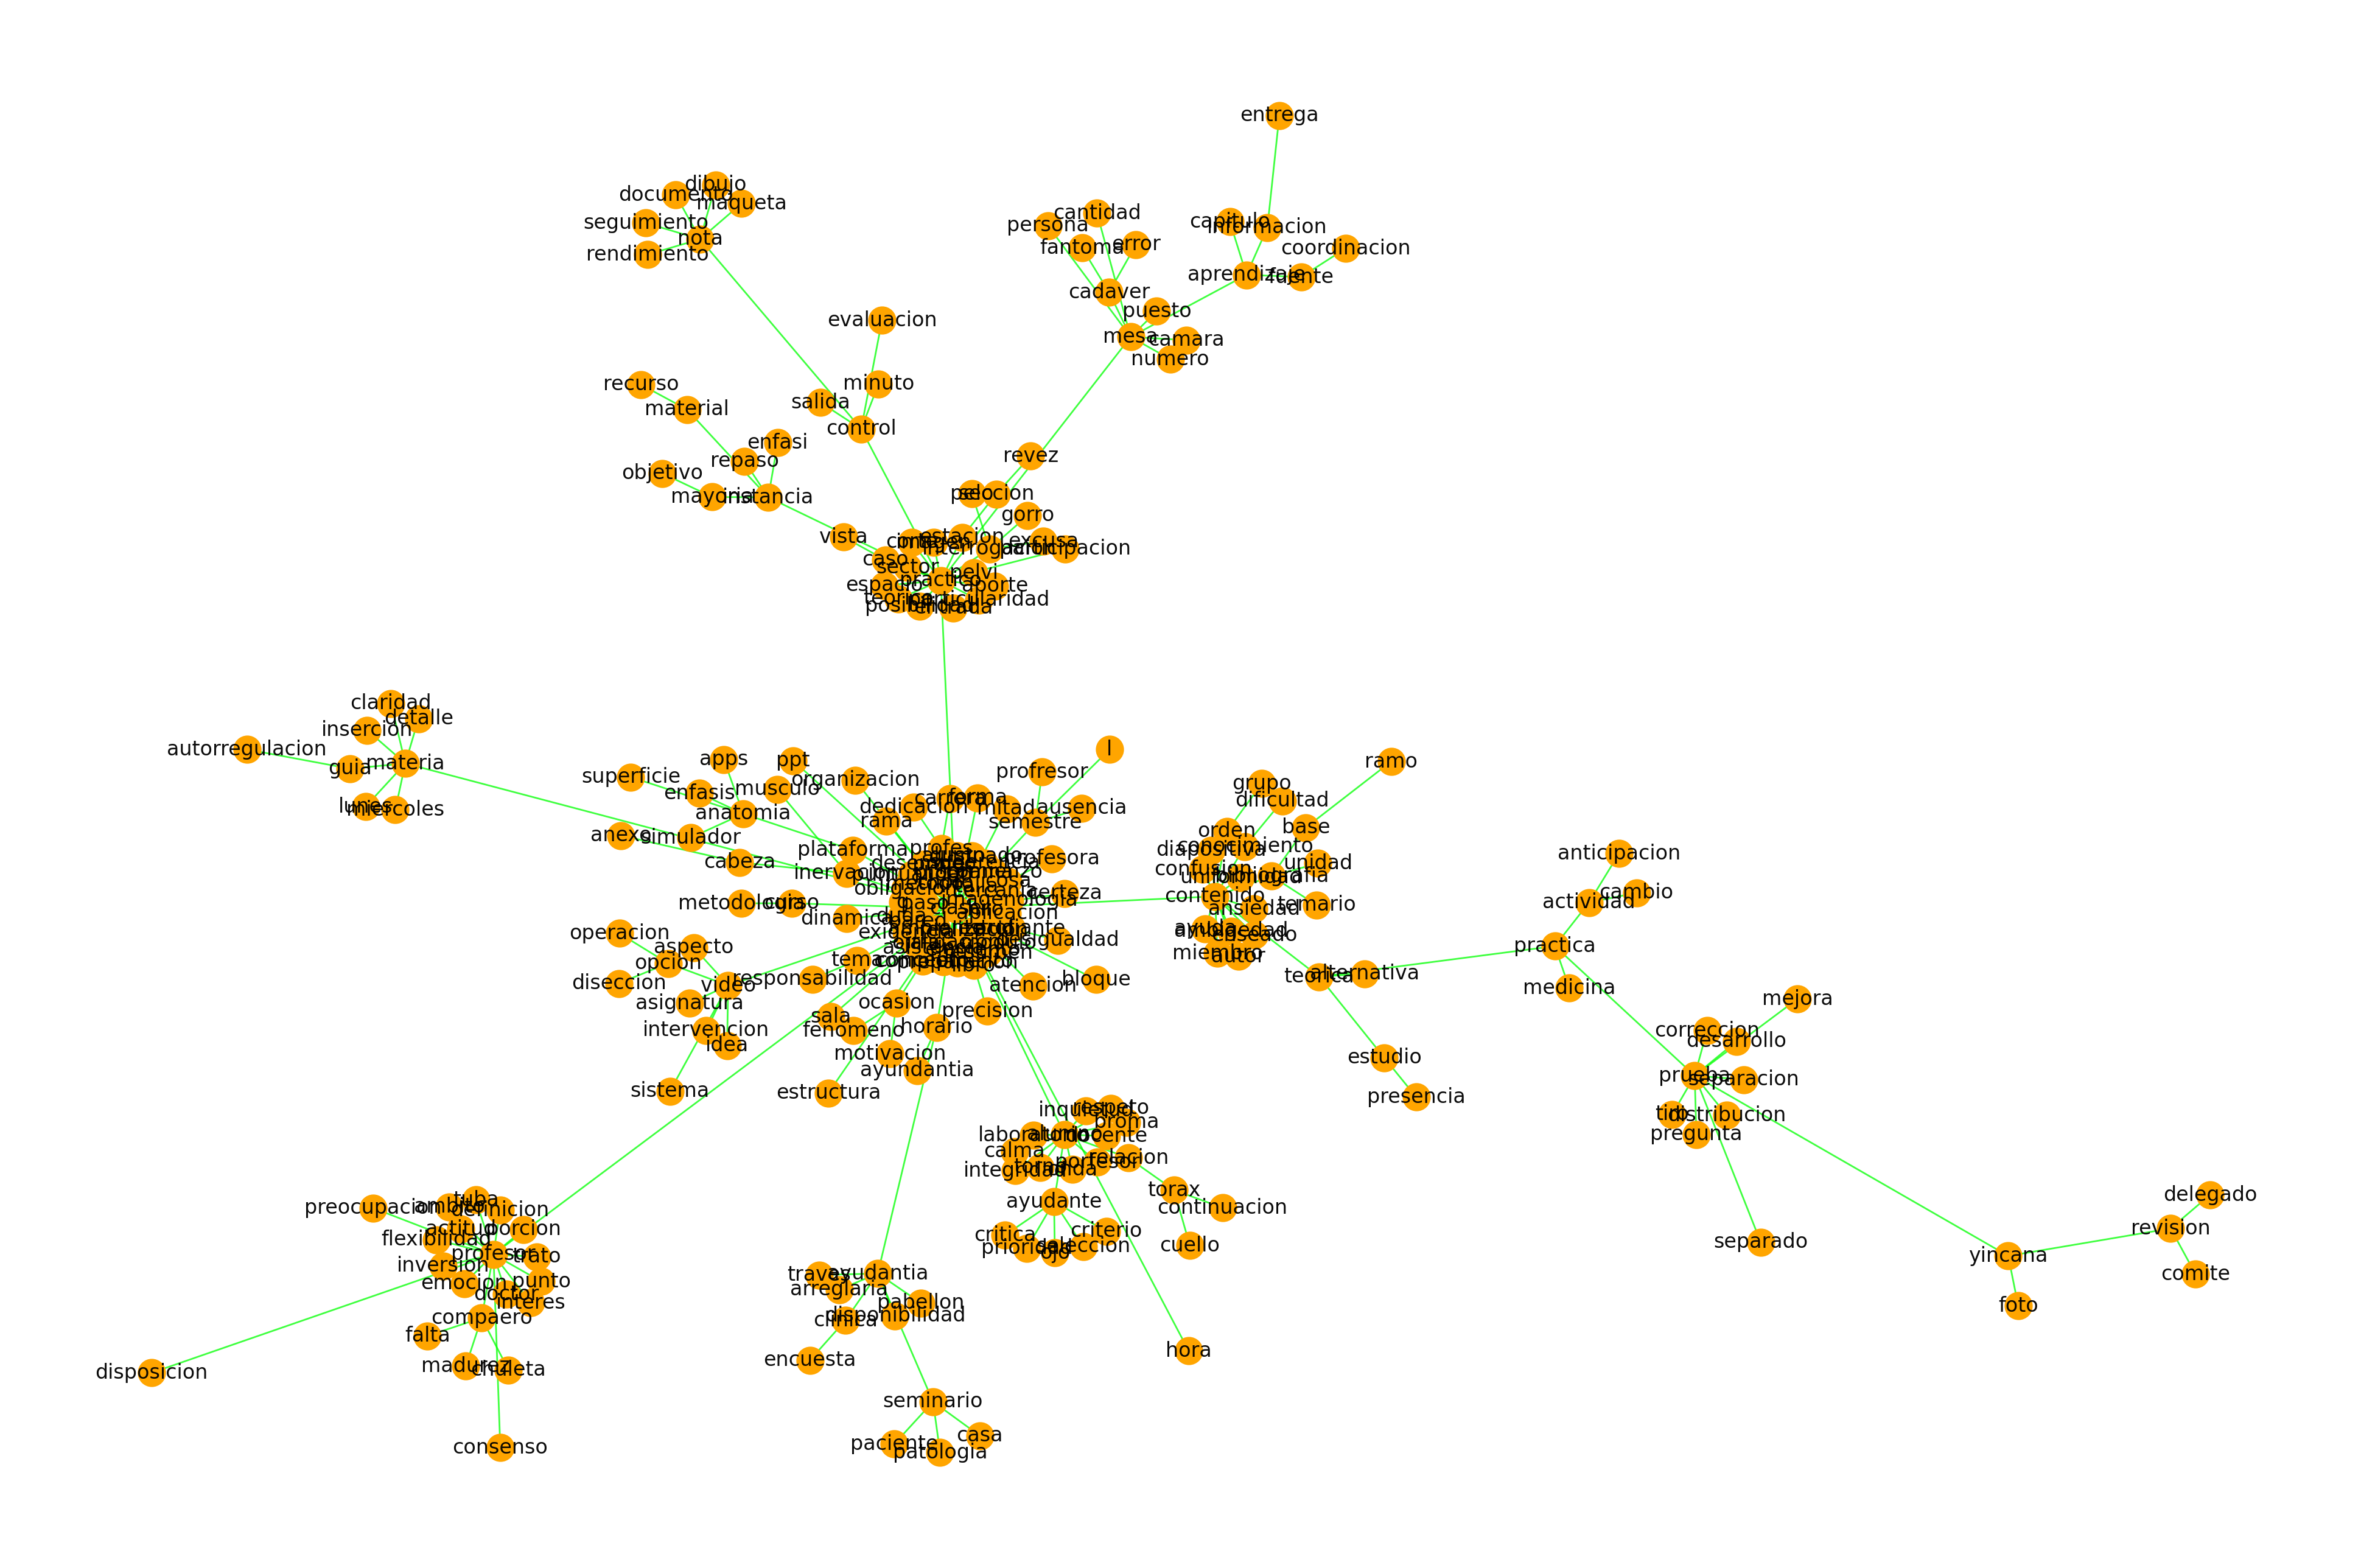

In [146]:
plot_graph(nx.maximum_spanning_tree(graph_text))

### main core

In [147]:
graph_text.remove_edges_from(nx.selfloop_edges(graph_text))
core_numbers = dict(nx.core_number(graph_text))
main_core = nx.k_core(graph_text)

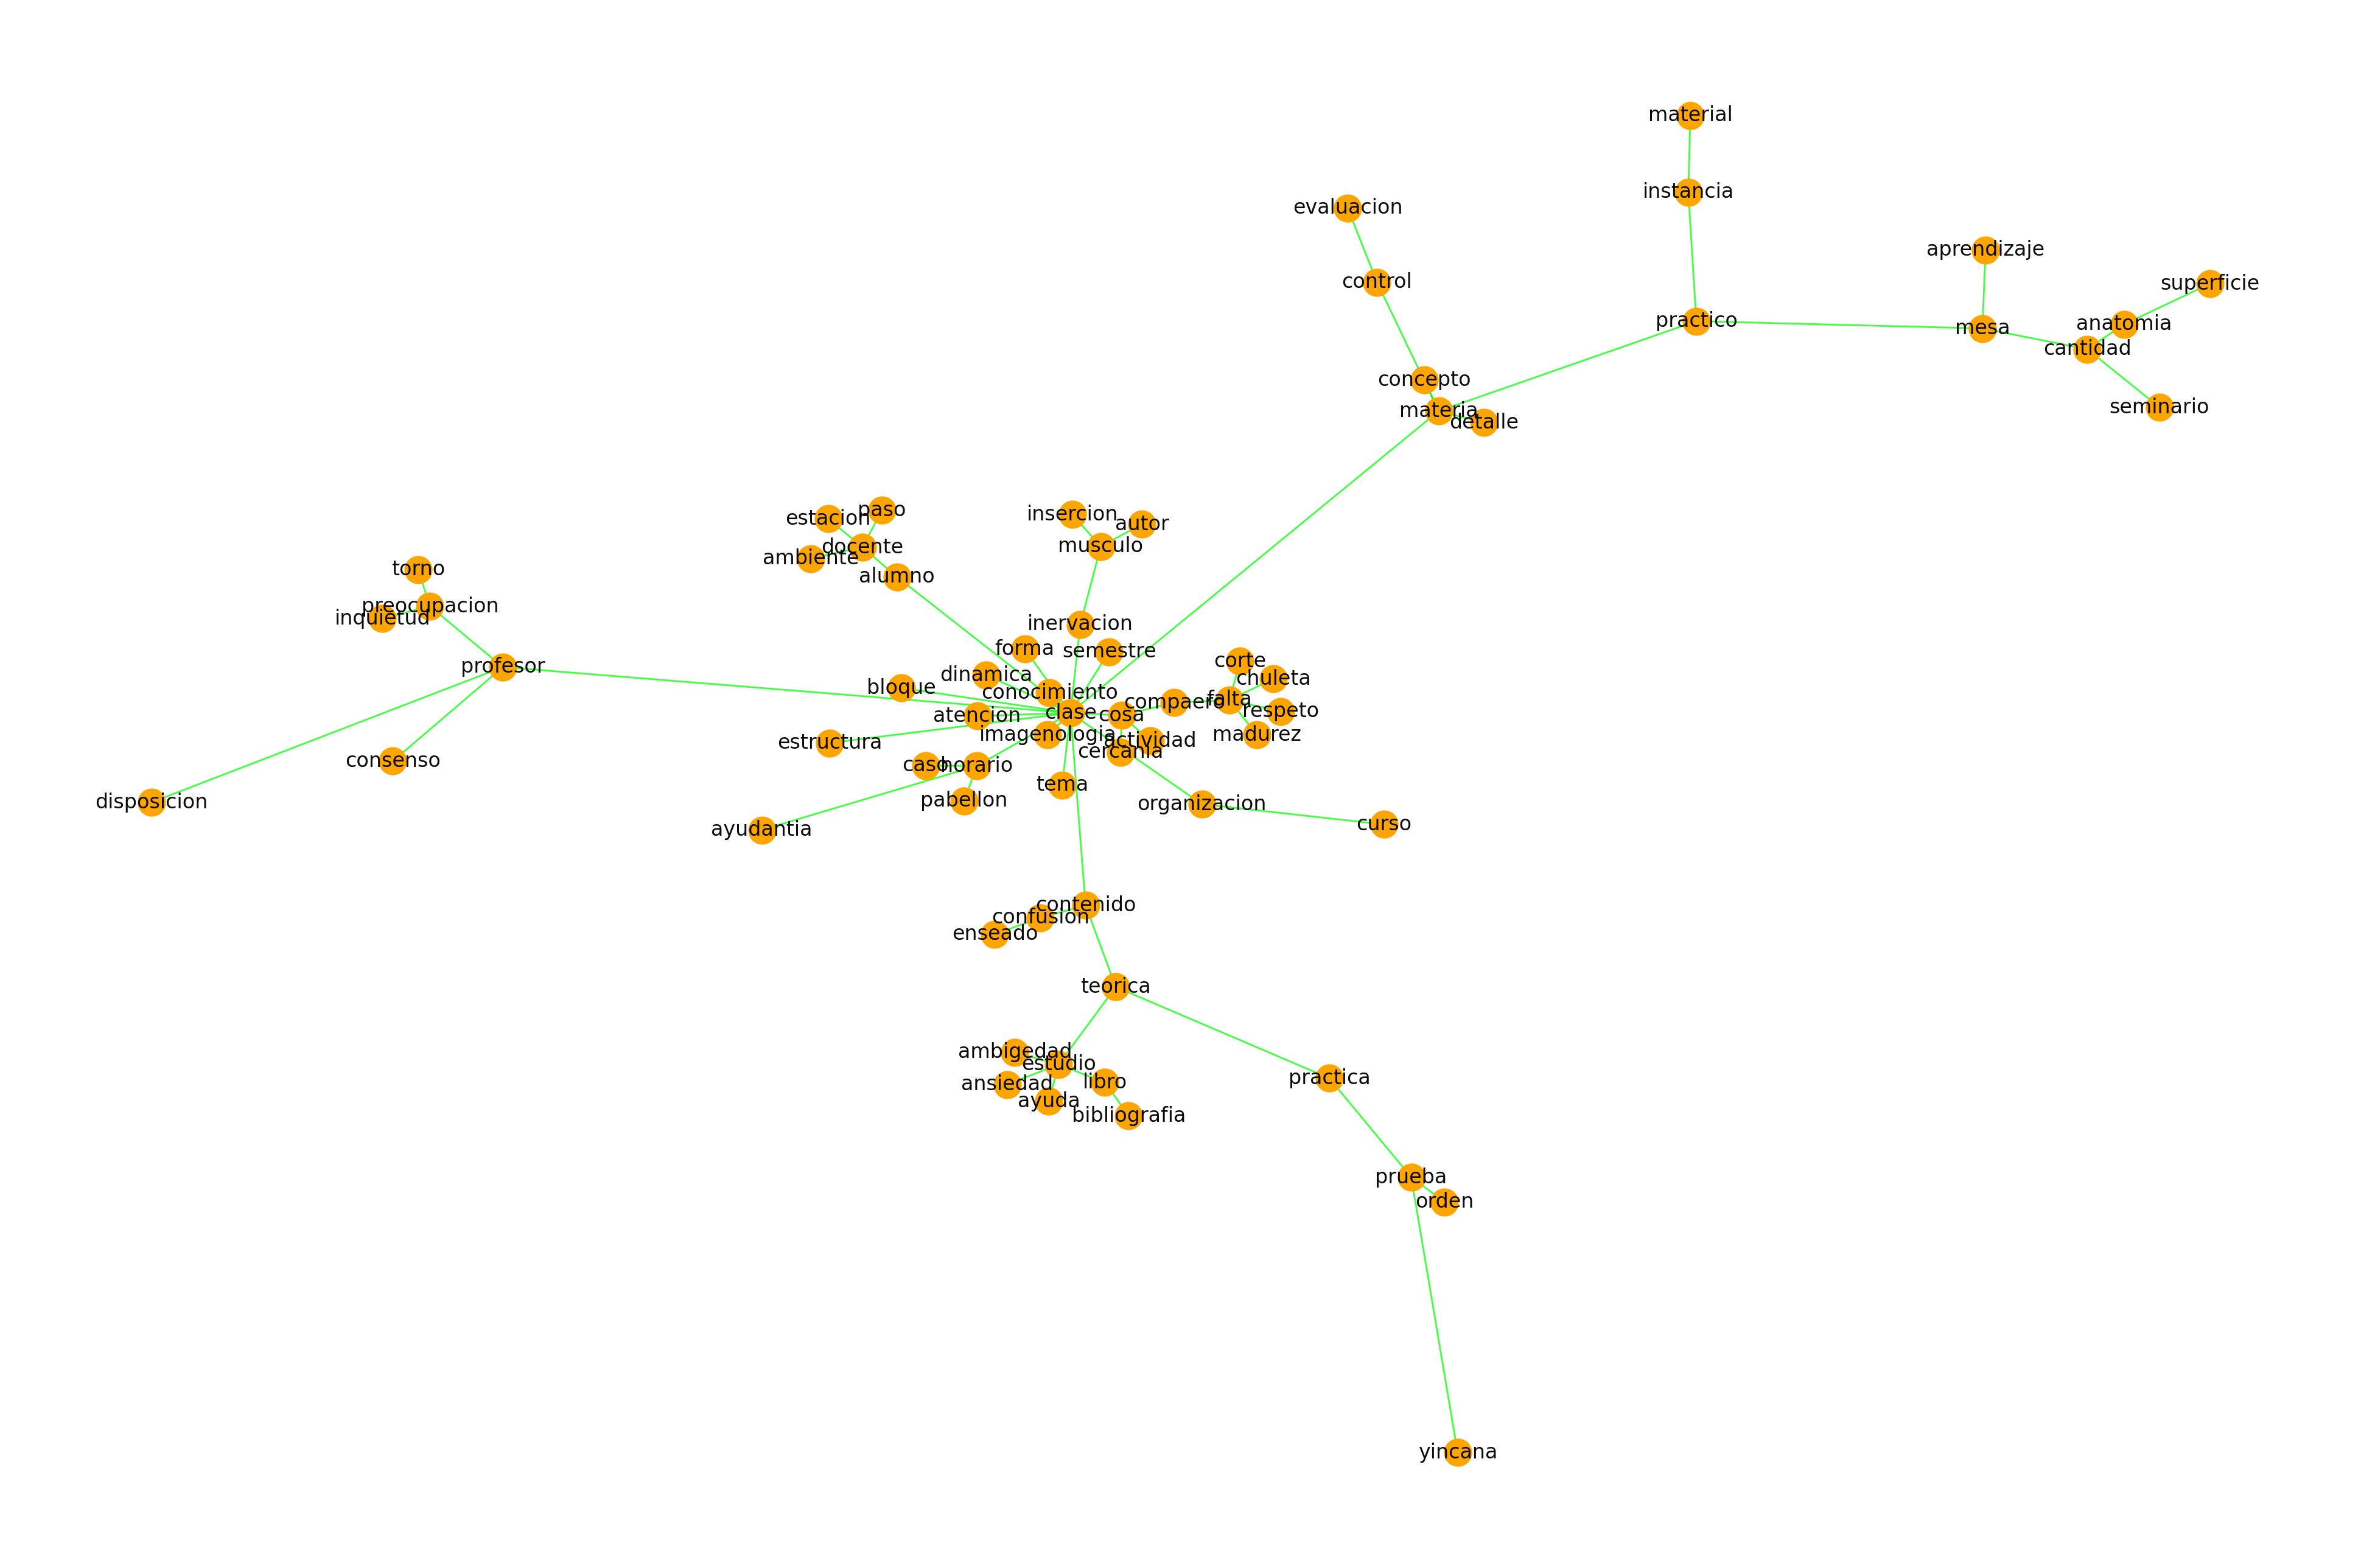

In [148]:
plot_graph(nx.maximum_spanning_tree(main_core))

## community structure

In [149]:
!pip install python-louvain

In [150]:
import community as community_louvain

In [151]:
partition = community_louvain.best_partition(main_core,resolution=1)

In [152]:
len(set(partition.values()))

6

In [153]:
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(partition.items()):
    v[value].append(key)

In [154]:
partition = dict(v)

In [155]:
partition

{1: ['actividad',
  'anatomia',
  'ayuda',
  'control',
  'dinamica',
  'estudio',
  'evaluacion',
  'imagenologia',
  'instancia',
  'material',
  'practica',
  'prueba',
  'superficie',
  'teorica',
  'yincana'],
 4: ['alumno',
  'ambiente',
  'aprendizaje',
  'cercania',
  'cosa',
  'disposicion',
  'inquietud',
  'mesa',
  'practico',
  'preocupacion',
  'profesor',
  'semestre',
  'torno'],
 2: ['ambigedad',
  'ansiedad',
  'atencion',
  'autor',
  'bibliografia',
  'bloque',
  'clase',
  'concepto',
  'confusion',
  'consenso',
  'contenido',
  'detalle',
  'enseado',
  'estructura',
  'inervacion',
  'insercion',
  'libro',
  'materia',
  'musculo',
  'tema'],
 0: ['ayudantia',
  'cantidad',
  'caso',
  'conocimiento',
  'forma',
  'horario',
  'pabellon',
  'seminario'],
 3: ['chuleta', 'compaero', 'corte', 'falta', 'madurez', 'respeto'],
 5: ['curso', 'docente', 'estacion', 'orden', 'organizacion', 'paso']}

In [156]:
def sum_cores(core_numbers,node,G):
    N = list(dict(G[node]).keys())
    C = 0
    for nodenode in N:
        C+=core_numbers[nodenode]
    return C

In [157]:
partition_core = {key:{word:sum_cores(core_numbers,word,graph_text) for word in partition[key]} for key in partition.keys()}

In [158]:
partition_core = {key:dict(sorted(partition_core[key].items(), key=lambda item: item[1],reverse=True)) for key in partition_core.keys()}

In [159]:
partition_core

{1: {'instancia': 115,
  'control': 92,
  'anatomia': 81,
  'prueba': 80,
  'practica': 71,
  'yincana': 71,
  'actividad': 56,
  'estudio': 50,
  'teorica': 50,
  'material': 42,
  'imagenologia': 40,
  'evaluacion': 38,
  'ayuda': 30,
  'superficie': 29,
  'dinamica': 25},
 4: {'profesor': 189,
  'practico': 157,
  'alumno': 110,
  'semestre': 64,
  'aprendizaje': 63,
  'disposicion': 55,
  'ambiente': 43,
  'mesa': 43,
  'preocupacion': 41,
  'cosa': 38,
  'cercania': 34,
  'inquietud': 25,
  'torno': 25},
 2: {'clase': 313,
  'materia': 138,
  'contenido': 97,
  'consenso': 58,
  'inervacion': 57,
  'autor': 50,
  'ambigedad': 40,
  'atencion': 38,
  'tema': 38,
  'concepto': 37,
  'ansiedad': 35,
  'musculo': 33,
  'libro': 32,
  'bibliografia': 30,
  'estructura': 30,
  'bloque': 29,
  'confusion': 25,
  'detalle': 25,
  'enseado': 25,
  'insercion': 25},
 0: {'ayudantia': 53,
  'seminario': 51,
  'forma': 48,
  'cantidad': 44,
  'caso': 39,
  'conocimiento': 37,
  'horario': 37,

## clustering!

In [160]:
cluster_sentences = {group:[] for group in partition.keys()}

In [161]:
## https://aclanthology.org/W04-3252.pdf

import numpy as np

def similarity(L1,L2):
    return len(list(set(L1) & set(L2)))/(np.log(len(L1))+np.log(len(L2)))

In [162]:
import numpy as np

def similarity_core(D,L2):
    if len(list(set(D.keys()) & set(L2)))==0:
        return 0
    else:
        return sum([D[word] for word in L2 if word in D.keys()])

In [163]:
import operator

for sentence in clean_corpus:
    D = {}
    for group in partition.keys():
        D[group]=similarity_core(partition_core[group],sentence)
    key=max(D.items(), key=operator.itemgetter(1))[0]
    cluster_sentences[key]+=[CORPUS[clean_corpus.index(sentence)]]

In [164]:
cluster_sentences_label = {}
for key in cluster_sentences.keys():
    key_label = max(partition_core[key].items(), key=operator.itemgetter(1))[0]
    cluster_sentences_label[key_label]=cluster_sentences[key]

In [165]:
DF=pd.DataFrame.from_dict(cluster_sentences_label,orient='index').T

In [166]:
DF.to_csv('grupos.csv')

In [167]:
DF

,instancia,profesor,clase,ayudantia,corte,curso
0,Que se mantenga la dinamica de separar por dia...,Que se agregue una mesa mas en los practicos a...,El orden de los contenido,sigan con los seminarios hechos desde la casa,muchos compañeros llamaban chuletas a los cort...,Orden y organizacion
1,Me gustaria que se hicieran mas ayudantías ant...,disminuir el numero de alumnos por mesas,Que se pongan de acuerdo si se va a prorizar e...,Ayudantia en horarios más comodos,None,un docente diferente en el paso por el laborat...
2,ayuda mas si es la teórica primero ya que se a...,6 a 8 alumnos por mesa permitiendo un aprendiz...,"que los practicos sean mas clase, en vez de de...",Profundizar mas en los casos clinicos de semin...,None,muchos por sección muchas veces uno no alcanza...
3,Mas casos clinicos o instancias para desarroll...,capítulos a leer para obtener la información d...,que se aconseje un libro para el estudio de un...,Mantener los seminarios clínicos donde teníamo...,None,que se vigile un poco más el orden de los grupos
4,Que se pudieran mantener las solemnes teórica ...,Debería haber un acuerdo previo entre los prof...,Creo que tener clase teórica separada en vari...,"ya que poseen óptimo conocimiento, pero al mom...",None,la organización del curso
...,...,...,...,...,...,...
82,Falta un poco de orden respecto a las notas y ...,None,Mejoraría las salas de las clases teóricas,None,None,None
83,Me gustaría que la yincana estuviese un poco m...,None,Que las clases sean un poco más ordenadas en c...,None,None,None
84,Encuentro mejor hacer la yincana antes de la p...,None,Mantener lo completa que son las clases y lo c...,None,None,None
85,que nos puedan dar más material para estudiar ...,None,Agregaría ayudantías para las materias que fue...,None,None,None


## k crust

In [168]:
graph_text.remove_edges_from(nx.selfloop_edges(graph_text))
k_crust = nx.k_crust(graph_text)

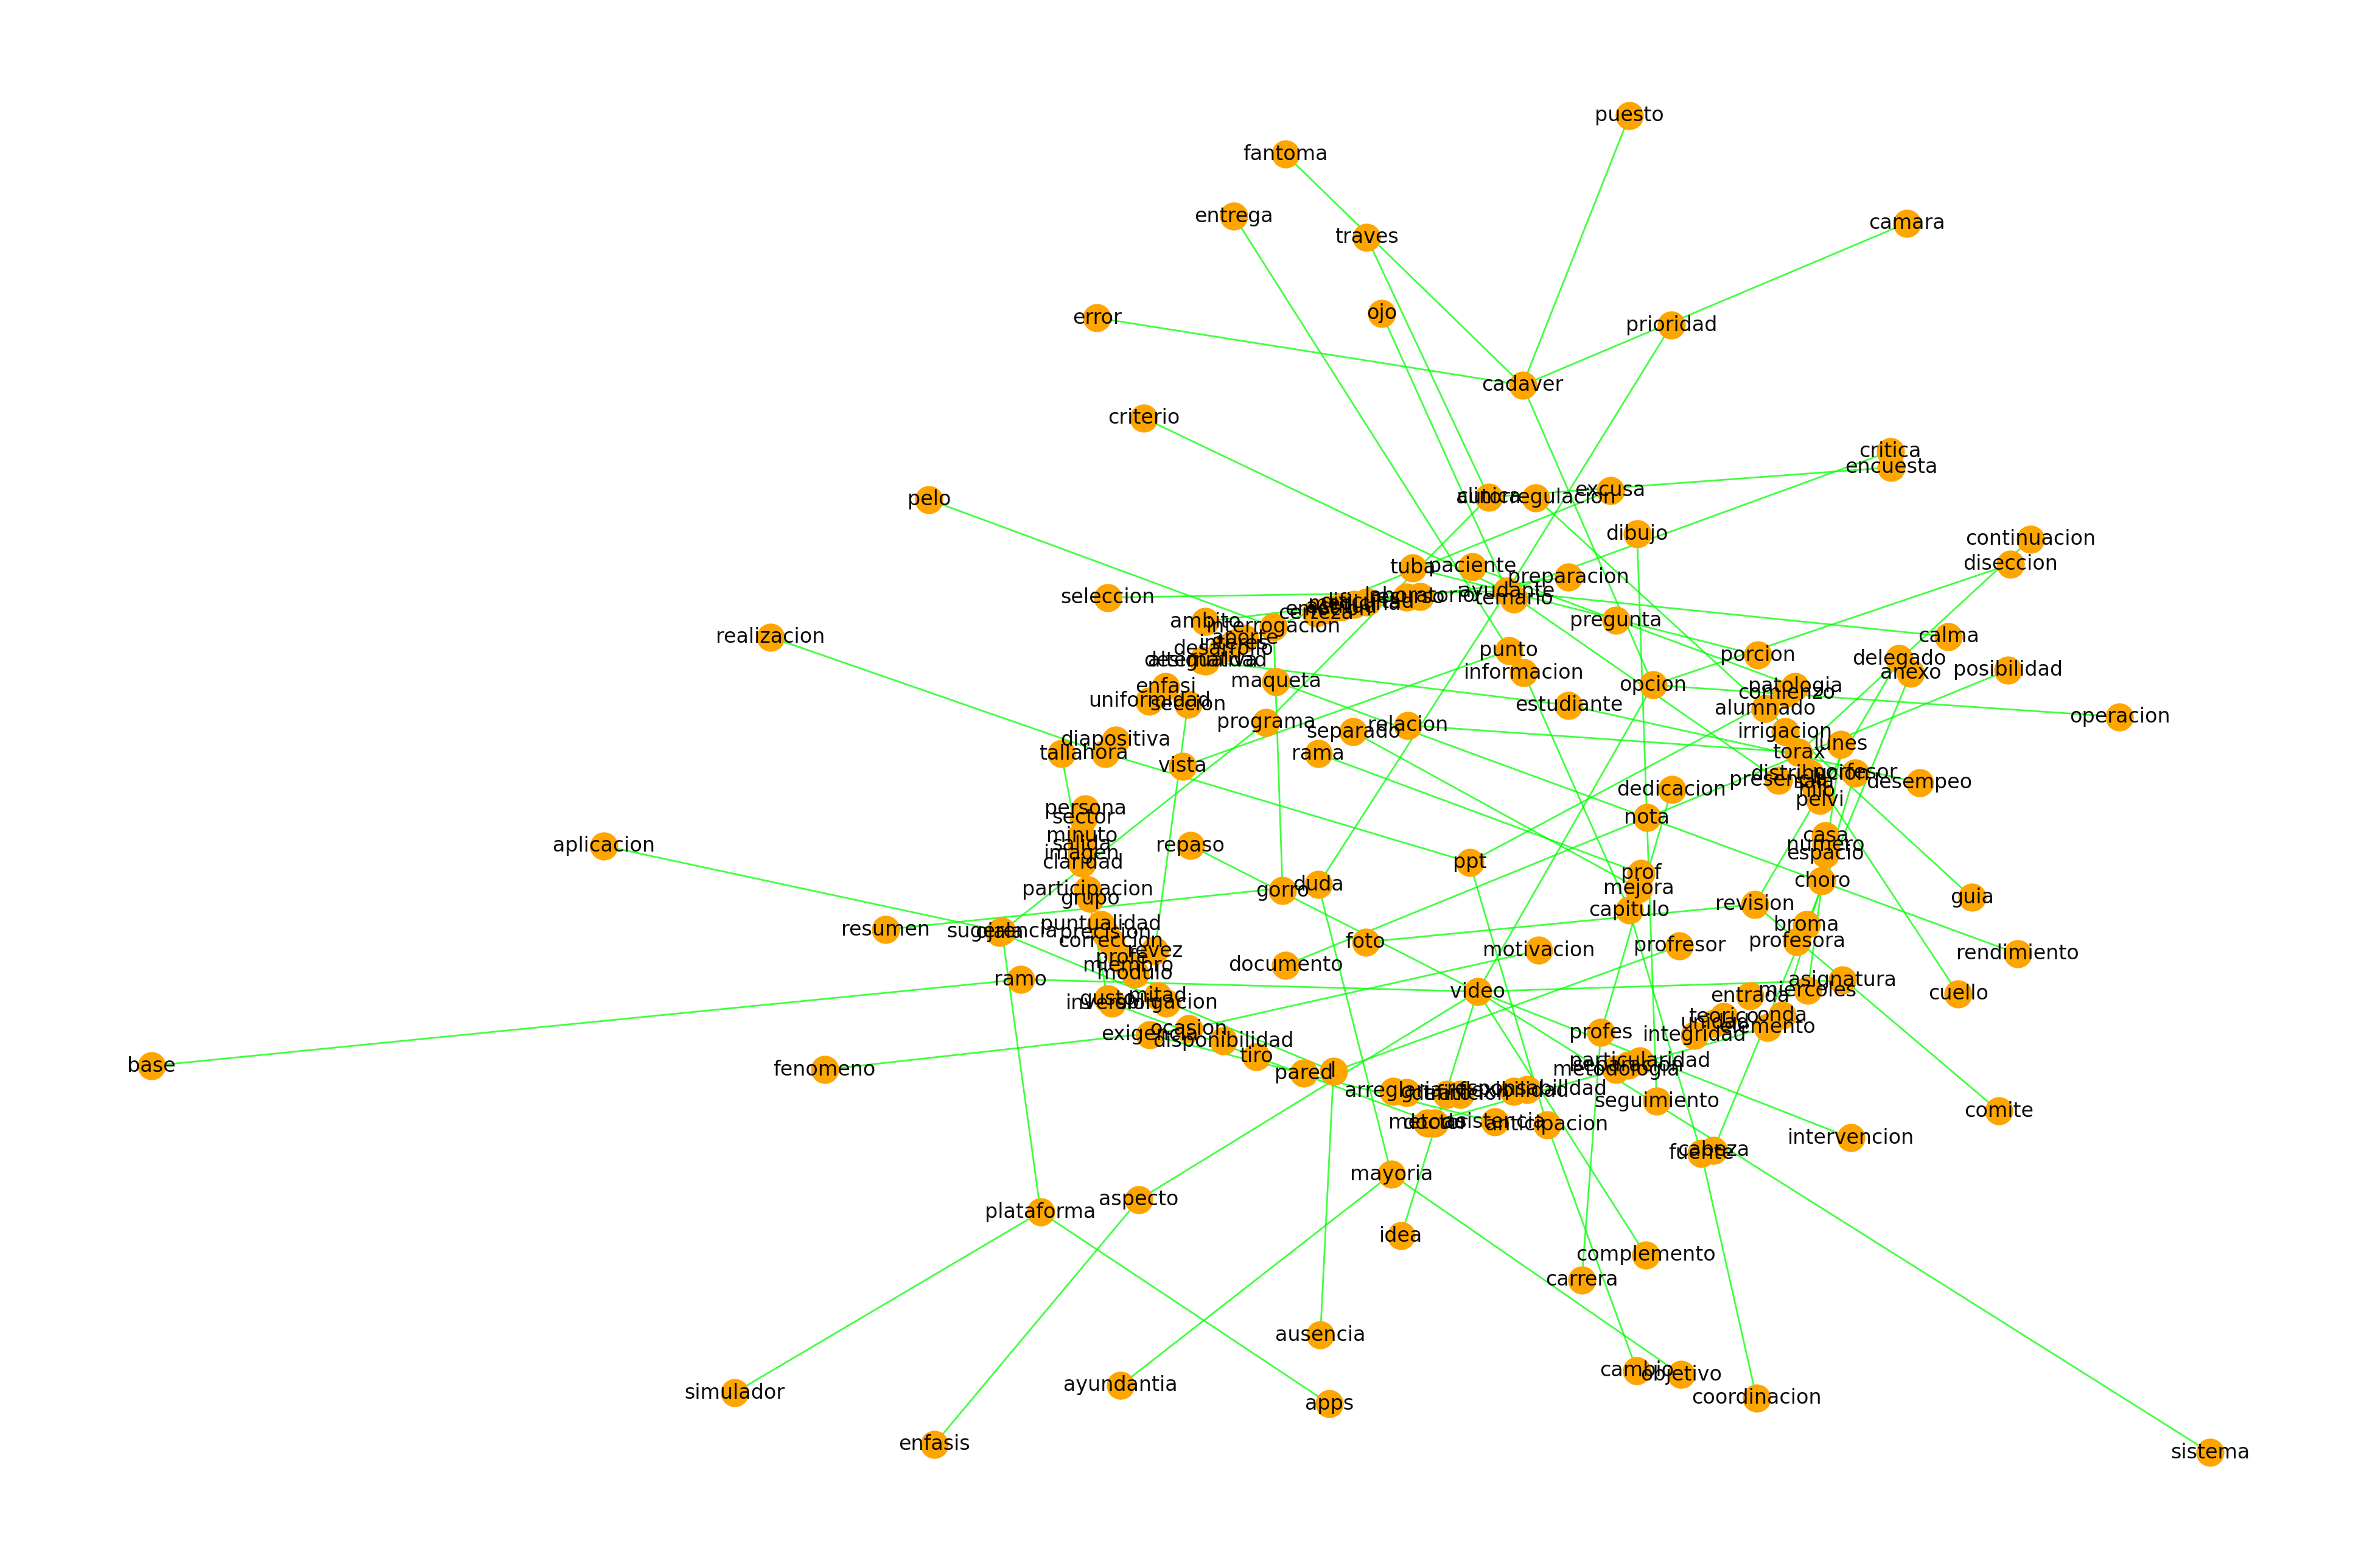

In [169]:
plot_graph(nx.maximum_spanning_tree(k_crust))

In [170]:
core_numbers_core = {key:core_numbers[key] for key in core_numbers.keys() if key in main_core.nodes()}
core_numbers_crust = {key:core_numbers[key] for key in core_numbers.keys() if key in k_crust.nodes()}

In [171]:
sim_sentences = []

In [172]:
for sentence in clean_corpus:
    sim_core=similarity_core(core_numbers_core,sentence)
    sim_crust=similarity_core(core_numbers_crust,sentence)
    sim_sentences+=[[CORPUS[clean_corpus.index(sentence)],sim_core,sim_crust]]

In [173]:
len(sim_sentences)

262

In [174]:
sim_sentences_filtered = [s for s in sim_sentences if s[1]>s[2] and s[2]==0]

In [175]:
len(sim_sentences_filtered)

96

In [176]:
sim_sentences_filtered = [s[0] for s in sim_sentences_filtered]

In [177]:
sim_sentences_filtered

['El orden de los contenido',
 'Que se pongan de acuerdo si se va a prorizar el contenido de las clases o el de la bibliografía',
 'Que se mantenga la dinamica de separar por dias las prueba teorica de la práctica',
 'Que se agregue una mesa mas en los practicos a fin ',
 '6 a 8 alumnos por mesa permitiendo un aprendizaje mas personalizado',
 'Me gustaria que se hicieran mas ayudantías antes de las pruebas ',
 'que los practicos sean mas clase, en vez de dejarnos solos a identificar estructuras.',
 'que se aconseje un libro para el estudio de una determinada materia',
 'Debería haber un acuerdo previo entre los profesores en cuanto a contenidos, limites, etc. ',
 'ayuda mas si es la teórica primero ya que se aprenden contenidos de la practica en el estudio de la teorica.',
 'Creo  que tener clase teórica separada en varios días ayudaría más, que tener vario bloques juntos. ',
 'Mas casos clinicos o instancias para desarrollarnos de forma clínica',
 'Ayudantia en horarios más comodos',


## k-means on graphs!

In [178]:
import numpy.linalg as la
import scipy.cluster.vq as vq

In [179]:
g = graph_text
#g = main_core

In [180]:
A = nx.adjacency_matrix(g,weight='weight')

In [181]:
D = np.diag(np.ravel(np.sum(A,axis=1)))
L = D - A

In [182]:
eigenvalues, eigenvectors = np.linalg.eig(L)

In [183]:
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

In [184]:
len(eigenvectors[:,1:32])

242

In [185]:
order = np.argsort(eigenvalues)
eigenvalues = eigenvalues[order]

In [186]:
eigenvalues[0:10]

array([-1.70245622e-14,  3.34077219e-01,  3.77099999e-01,  4.29064720e-01,
        4.38647436e-01,  4.53509946e-01,  4.70587435e-01,  5.58739616e-01,
        6.14381682e-01,  6.58318278e-01])

In [187]:
embedding_size = 3
v_0 = eigenvectors[:, order[0]]
v = eigenvectors[:, order[1:(embedding_size+1)]]

In [188]:
len(v)

242

In [189]:
embeddings = dict(zip(g.nodes(),[vector.tolist()[0] for vector in v]))

In [115]:
len(list(v))

265

In [116]:
X=[]

for node in g.nodes():
    X+=[embeddings[node]]

In [117]:
from sklearn.manifold import TSNE

X = TSNE(n_components=2,perplexity=15,init='pca',n_iter=1000,random_state=0).fit_transform(X)

In [118]:
#from sklearn.decomposition import KernelPCA
#transformer = KernelPCA(n_components=2, kernel='sigmoid')
#X = transformer.fit_transform(X)

In [119]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

In [120]:
XX=[]

for i in range(len(x)):
    XX+=[[x[i],y[i]]]

In [121]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in [2,3,4,5,6,7,8,9,10]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(XX)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(XX, labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4188209
For n_clusters = 3 The average silhouette_score is : 0.4898114
For n_clusters = 4 The average silhouette_score is : 0.4345152
For n_clusters = 5 The average silhouette_score is : 0.43709362
For n_clusters = 6 The average silhouette_score is : 0.41668642
For n_clusters = 7 The average silhouette_score is : 0.39676163
For n_clusters = 8 The average silhouette_score is : 0.42442304
For n_clusters = 9 The average silhouette_score is : 0.4072306
For n_clusters = 10 The average silhouette_score is : 0.4435807


In [123]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(XX)
labels = dict(zip(list(embeddings.keys()),kmeans.labels_))

In [124]:
v = defaultdict(list)

for key, value in sorted(labels.items()):
    v[value].append(key)
    
labels_group = dict(v)

In [125]:
colors_group = {0:['gold','o'],1:['m','s'],2:['palegreen','D'],3:['r','H']}

In [126]:
len(x)

265

In [127]:
labels_group.keys()

dict_keys([1, 2, 0])

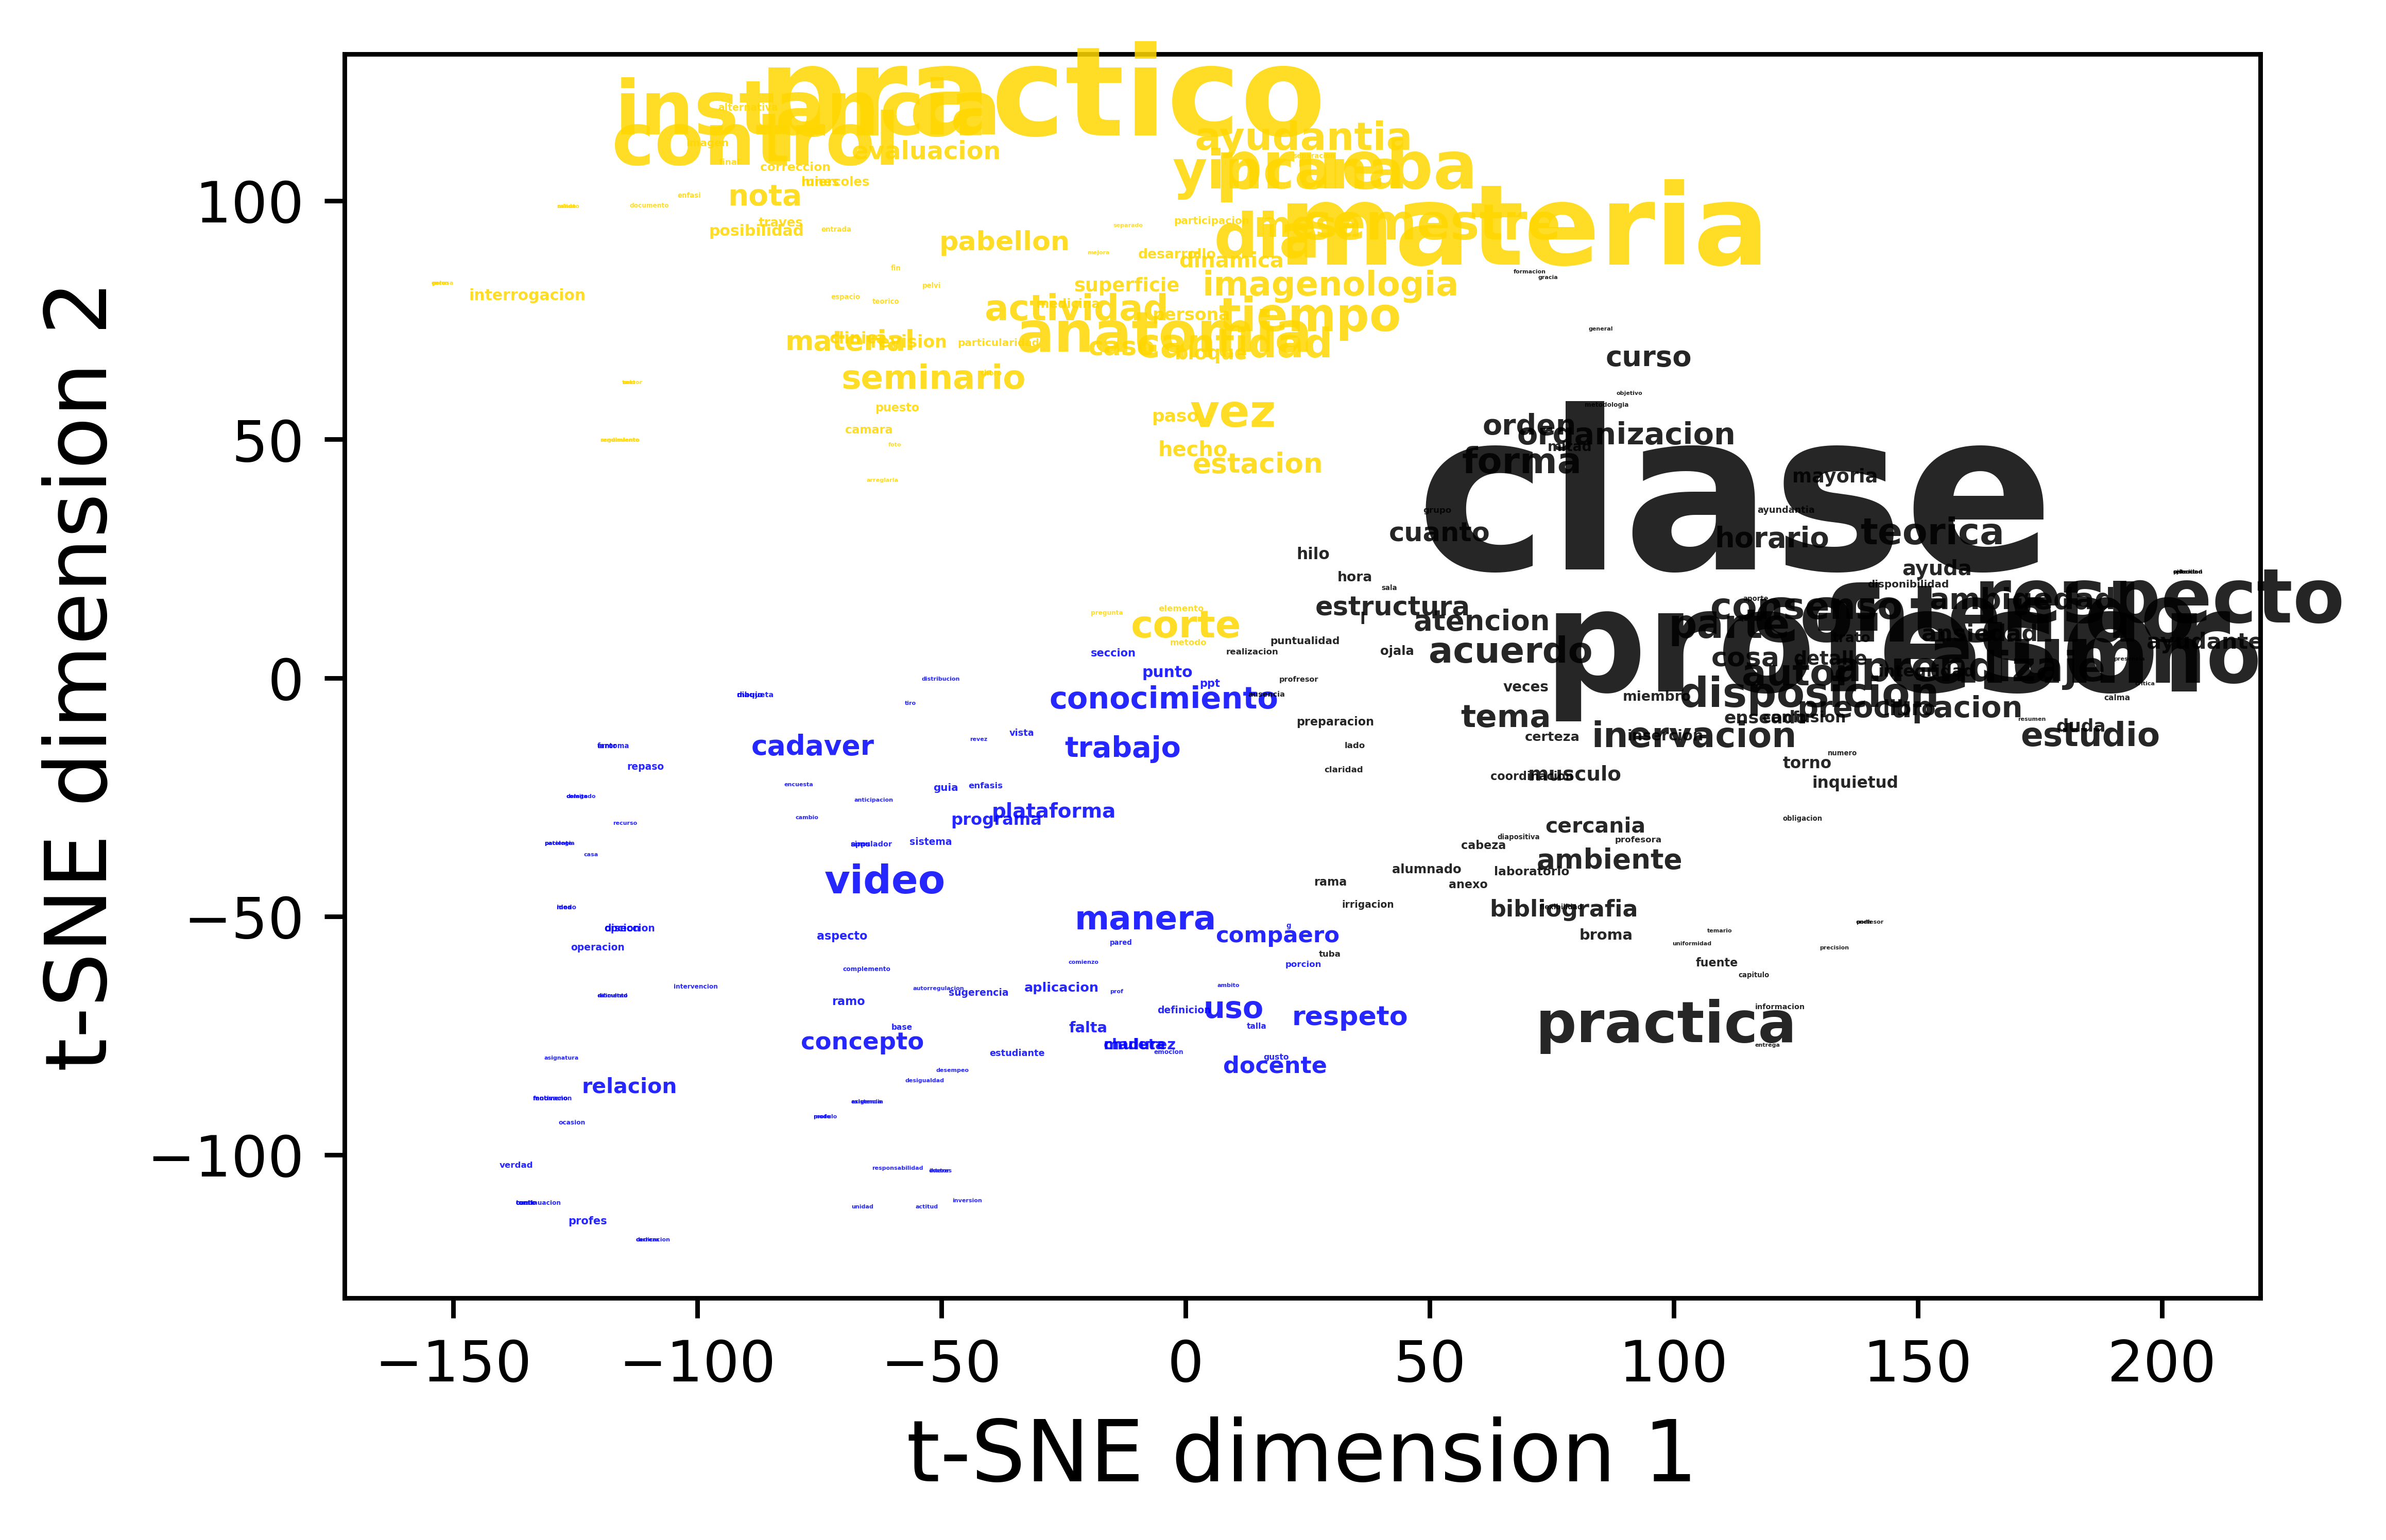

In [129]:
fig, ax = plt.subplots(dpi=800)

for group in labels_group.keys():
    
    ax.plot([x[i] for i in [list(embeddings.keys()).index(node) for node in embeddings.keys() if labels[node]==group]],[y[i] for i in [list(embeddings.keys()).index(node) for node in embeddings.keys() if labels[node]==group]],marker=colors_group[group][1],color=colors_group[group][0],markersize=0,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True)

#for fam in families:
    
#    ax.plot([x[i] for i in [list(embeddings.keys()).index(language) for language in embeddings.keys() if language in id_family.keys() and id_family[language]==fam]],[y[i] for i in [list(embeddings.keys()).index(language) for language in embeddings.keys() if language in id_family.keys() and id_family[language]==fam]],marker=colors[fam][1],color=colors[fam][0],markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True,label=fam)

for node in embeddings.keys():
    i=list(embeddings.keys()).index(node)
    font_size = sum_cores(core_numbers,node,g)/10
    if labels[node]==0:
        ax.annotate(node, weight='demi', color='k', xy=(x[i],y[i]), fontsize=font_size, alpha=0.85)
    elif labels[node]==1:
        ax.annotate(node, weight='demi', color='blue', xy=(x[i],y[i]), fontsize=font_size, alpha=0.85)
    elif labels[node]==2:
        ax.annotate(node, weight='demi', color='gold', xy=(x[i],y[i]), fontsize=font_size, alpha=0.85)
    else:
        ax.annotate(node, weight='demi', color='m', xy=(x[i],y[i]), fontsize=font_size, alpha=0.85)

plt.grid(False)
#plt.legend(loc='best',fontsize=5)
plt.ylabel(r't-SNE dimension 2',fontsize=15)
plt.xlabel(r't-SNE dimension 1',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('TSNE.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()